In [23]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [24]:
X = pd.read_csv('intent_matrix.csv')
X = X.drop(columns=['Unnamed: 0'])

y = pd.read_csv('discount_labels.csv')
y = y.drop(columns=['Unnamed: 0'])

X = X.iloc[:,0:13]
y

,discount%
0,30
1,25
2,17
3,10
4,5
...,...
2740,22
2741,24
2742,28
2743,13


In [25]:
# encoding categorical data
intent_map = { 0: np.NaN,
               1:'intro',
               2:'vague-price',
               3:'init-price', 
               4:'counter-price', 
               5:'agree', 
               6:'inquiry', 
               7:'disagree', 
               8:'insist',
}
             
for v in intent_map:
    X = X.replace(to_replace=intent_map[v], value=v)

In [26]:
def categorizeDiscounts(x):
    if len(x) == 2:
        if x[-1] >= '1' and x[-1] <= '5':
            return int(x[0] + '0')
        else:
            return int(x[0] + '5')
    else:
        if x > '5':
            return 10
        elif x > '1' and x <= '5':
            return 5
        else:
            return 0

y['discount_labels'] = y['discount%'].apply(lambda x: categorizeDiscounts(str(x)))
y

,discount%,discount_labels
0,30,35
1,25,20
2,17,15
3,10,15
4,5,5
...,...,...
2740,22,20
2741,24,20
2742,28,25
2743,13,10


/Users/kabirbatra/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kabirbatra/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


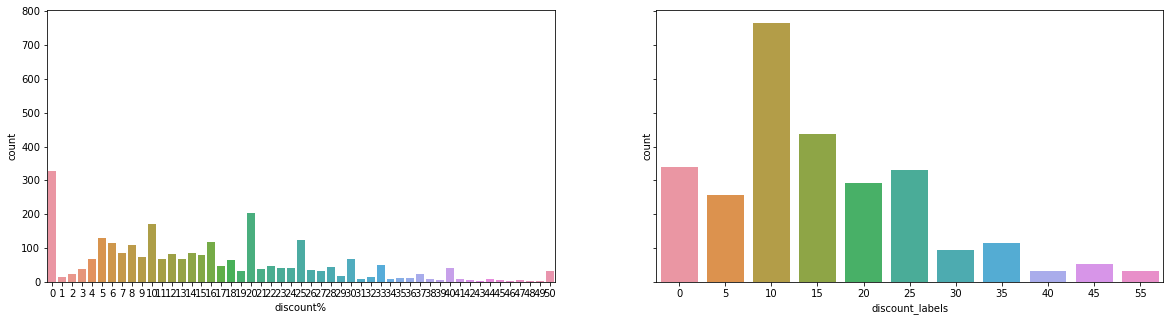

In [27]:
fig, ax =  plt.subplots(1, 2, figsize = (20,5), sharey=True)

sns.countplot(y['discount%'], ax=ax[0])
sns.countplot(y['discount_labels'], ax=ax[1])

plt.show()

# plt.figure(figsize=(8,6))
# sns.countplot(x='discount_labels', data=y)

# plt.figure(figsize=(8,6))
# sns.countplot(x='discount%', data=y)

In [28]:
#training classification model and saving it using pickle in pp_model.pkl
# classifier = DecisionTreeClassifier(criterion='entropy',max_depth=30, random_state=42)
# classifier.fit(X, y['discount_labels'])

# with open('model.pkl', 'wb') as files:
#     pickle.dump(classifier, files)

In [29]:
#loading previously trained model if any
MODEL_FILE_NAME = 'pp_model.pkl'

if os.path.exists(MODEL_FILE_NAME):
    with open(MODEL_FILE_NAME , 'rb') as f:
        classifier = pickle.load(f)
else:
    classifier = DecisionTreeClassifier(criterion='entropy',max_depth=30, random_state=42)
    classifier.fit(X, y['discount_labels'])

    with open(MODEL_FILE_NAME , 'wb') as files:
        pickle.dump(classifier, files)

In [30]:
y_pred = classifier.predict(X)

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

# accuracy = metrics.accuracy_score(y['discount%'], y_pred)
accuracy = metrics.accuracy_score(y['discount_labels'], y_pred)
accuracy

0.41129326047358833

In [32]:
# intent_map = { 0: np.NaN,
#                1:'intro',
#                2:'vague-price',
#                3:'init-price', 
#                4:'counter-price', 
#                5:'agree', 
#                6:'inquiry', 
#                7:'disagree', 
#                8:'insist',
# }

classifier.predict([[1, 6, 4, 7, 4, 0, 0, 0, 0, 0, 0, 0, 0]])

array([10])